In [17]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pickle as pkl
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

#Change the resolution of the plots
plt.rcParams['figure.dpi']= 200

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# <font color="darkmagenta"> Upper limits </font>

In [18]:
channels = ["WW","bb","tautau","mumu","nuenue","numunumu","nutaunutau"]
ch_title = {"WW":r"$W^+ W^-$","bb":r"$b\bar{b}$","tautau":r"$\tau \bar{\tau}$", "mumu":r"$\mu^+\mu^-$","nuenue":r"$\nu_e \bar{\nu}_e$","numunumu":r'$\nu_\mu \bar{\nu}_\mu$',"nutaunutau":r"$\nu_\tau \bar{\nu}_\tau$"}
cols = {"WW":"purple","bb":"darkturquoise","tautau":'dodgerblue', "mumu":"green","nuenue":"hotpink","numunumu":'deeppink',"nutaunutau":"pink"}

filepath = '/data/user/tchau/DarkMatter_OscNext/Sensitivity/UpperLimit/'
# filepath = '/data/user/tchau/DarkMatter_OscNext/Sensitivity/backup/UpperLimit/'
file = os.listdir(filepath)

ann_WW_NFW_30points_MC1122_BKGprecomp_gcinjNone_gcmodelNone_fixgc1.pkl
ann_bb_NFW_30points_MC1122_BKGprecomp_gcinjNone_gcmodelNone_fixgc1.pkl
ann_tautau_NFW_30points_MC1122_BKGprecomp_gcinjNone_gcmodelNone_fixgc1.pkl
ann_mumu_NFW_30points_MC1122_BKGprecomp_gcinjNone_gcmodelNone_fixgc1.pkl
ann_nuenue_NFW_30points_MC1122_BKGprecomp_gcinjNone_gcmodelNone_fixgc1.pkl
ann_numunumu_NFW_30points_MC1122_BKGprecomp_gcinjNone_gcmodelNone_fixgc1.pkl
ann_nutaunutau_NFW_30points_MC1122_BKGprecomp_gcinjNone_gcmodelNone_fixgc1.pkl


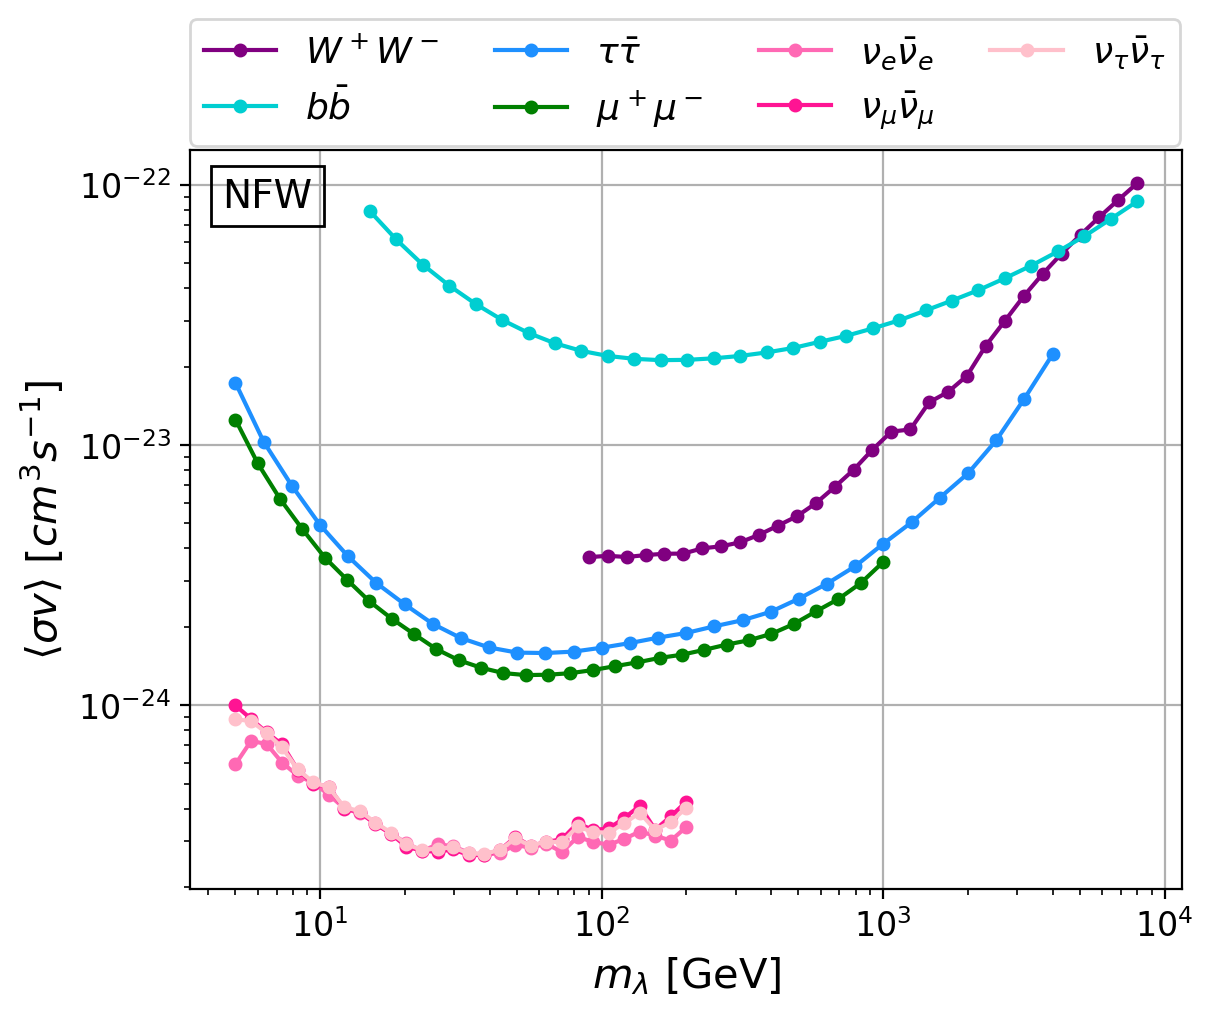

In [19]:
profile = 'NFW' # NFW, Burkert
process = 'ann' # ann, decay
for ch in channels:
    path = [file[i] for i in range(len(file)) if (f"{process}_" + ch +"_"+ profile in file[i] and 'MC1122_BKGprecomp_gcinjNone_gcmodelNone_fixgc1.pkl' in file[i] and '30points' in file[i])]
    if len(path)==0: continue
    print(path[0])
    UL = pkl.load(open(filepath+path[0], "rb"))
    limit =  UL['UL']
    # limit =  UL['fraction']

    plt.plot(UL['mass'], limit, marker='o',label=ch_title[ch], color=cols[ch], markersize=4) 




plt.semilogy()
plt.semilogx()

# plt.ylim(1e-25, 9e-22)
# plt.ylim(1e-23, 10)

plt.legend(ncol=4, bbox_to_anchor=(-0.019, 1.1, 1.035, 0.101), loc='upper left', mode="expand", fontsize=13)

if process=='ann':  plt.ylabel(r'$\langle \sigma v \rangle$'+r' $[cm^3 s^{-1}]$', fontsize=15)
if process=='decay': plt.ylabel(r'$\tau$'+r' $[s]$', fontsize=15)
# plt.ylabel(r'$\xi_{ann}$')
# plt.ylabel(r'$N_{signal}$')


plt.xlabel(r'$m_{\lambda}$'+' [GeV]', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.figtext(0.15,0.82, profile, bbox=dict(facecolor='none', edgecolor='black'), fontsize=14)
plt.grid()


# <font color="darkmagenta"> Systematics </font>

In [ ]:
%%capture
# ########################################################################
# Detector related systematics
#
channels = ['WW', 'bb', 'tautau', 'mumu', 'nuenue', 'numunumu', 'nutaunutau'] 
profiles = ['NFW', 'Burkert']
processes = ['ann', 'decay']
sys=['1124', '1125', '1126', '1127', '1128', '1129', '1130', '1131', '1132', '1133', '0000']

labels = {'1124':r'DOM $\epsilon: +10\%$', '1125':r'DOM $\epsilon: -10\%$', '1126':r'HI p0: $-0.3$', '1127':r'HI p0: $+0.2$', '1128':r'HI p1: $-0.05$', '1129':r'HI p1: $+0.05$', '1130':r'Abs.: $+5\%$', 
        '1131':r'Abs.: $-5\%$', '1132':r'Scat.: $+5\%$', '1133':r'Scat. $-5\%$', '0000':'nominal no bfr', '1122':'nominal'}

# Loop on all channels and save the figures for each cases of channel, profile and process
for channel in channels:
    for profile in profiles:
        for process in processes:
            fig, ax = plt.subplots()
            for s in sys:
                path = [file[i] for i in range(len(file)) if (process + "_" + channel +"_"+ profile in file[i] and '30points_MC{}_BKGprecomp_gcinjNone_gcmodelNone_fixgc1.pkl'.format(s) in file[i])]

                if len(path)==0: continue
                print(path[0])
                UL = pkl.load(open(filepath+path[0], "rb"))
                if s == '1122':
                    alpha = 1.
                    marker='*'
                    x_base, y_base = UL['mass'], UL['UL']
                else:
                    alpha = 0.5
                    marker=''
            
                ax.plot(UL['mass'], UL['UL'],label=labels[s], alpha=alpha, marker=marker)       

            # Add the Brazillian:
            brazillian = pkl.load(open('/data/user/tchau/DarkMatter_OscNext/Sensitivity/UpperLimit/{}_{}_{}_30points_MC1122_BKGprecomp_nsample500_gcinjNone_gcmodelNone_fixgc1.pkl'.format(process, channel, profile), 'rb'))

            ax.plot(brazillian['mass'], brazillian['median'], marker="*", label='median', color='black')

            ax.fill_between(brazillian['mass'], brazillian['2.5'], brazillian['97.5'], alpha=.15, color='green')
            ax.fill_between(brazillian['mass'], brazillian['16'], brazillian['84'], alpha=.1, color='green')


            ax.legend(ncol=4, bbox_to_anchor=(-0.019, 1.15, 1.035, 0.101), loc='upper left', mode="expand", fontsize=10, handlelength=1.)
            ax.set_xticklabels([], fontsize=0)
            # ax.set_yticklabels(ax.get_yticks(),rotation=45)

            if process=='ann':
                ax.set(ylabel=r'$\langle \sigma v \rangle$'+r' $[cm^3 s^{-1}]$')
            if process=='decay':
                ax.set(ylabel=r'$\tau$'+r' $[s]$')
            ax.semilogy()
            ax.semilogx()
            # ax.set_ylim(1.5e-25, 1e-20)
            # ax.set_ylim(8e-26, 1e-20)

            ax.grid()


            ax.text(.02, .95, f'{ch_title[channel]} - {profile}', ha='left', va='top', transform=ax.transAxes, fontsize=15)


            # Ratio plot!
            ax2 = fig.add_subplot(1, 1, 1, sharex=ax)
            # fig.subplots_adjust(hspace=0.)
            ax2.set_position([0.125, -0.1, 0.775, 0.2])

            x_base, y_base = brazillian['mass'], brazillian['median']
            ax2.plot(x_base, y_base-y_base,label='nominal', alpha=1, marker='*', color='black')   

            for s in sys:
                path = [file[i] for i in range(len(file)) if (process + "_" + channel +"_"+ profile in file[i] and '30points_MC{}_BKGprecomp_gcinjNone_gcmodelNone_fixgc1.pkl'.format(s) in file[i])]
                # path = [file[i] for i in range(len(file)) if ('ann_'+ channel +"_"+ profile in file[i] and '30points_MC{}_BKGFFT_ULbybisection_gcinjTrue_gcmodelTrue_fitgc.pkl'.format(s) in file[i])]

                if len(path)==0: continue
                print(path[0])
                UL = pkl.load(open(filepath+path[0], "rb"))
                ax2.plot(UL['mass'], y_base/UL['UL']-1,label=s, alpha=0.5)   
            # ax.semilogy()
            ax2.semilogx()
            ax2.set(xlabel=r'$m_{\lambda}$'+' [GeV]', ylabel=r'nominal/syst - 1')
            ax2.set_ylim(-1, 1)
            ax2.grid()
            fig.savefig(f'/data/user/tchau/Sandbox/GC_OscNext/PlotScripts/Plots/UL_syst_{process}_{profile}_{channel}.png', bbox_inches='tight')

In [ ]:
%%capture
# ########################################################################
# Jfactor uncertainties
#
channels = ['WW', 'bb', 'tautau', 'mumu', 'nuenue', 'numunumu', 'nutaunutau'] 
profiles = ['NFW', 'Burkert']
processes = ['ann', 'decay']
sys=['errors1', 'errors2']

labels = {'errors1':'Jfactor, error+', 'errors2':'Jfactor, error-'}

for channel in channels:
    for profile in profiles:
        for process in processes:
            fig, ax = plt.subplots()
            for s in sys:
                path = [file[i] for i in range(len(file)) if (process + '_'+ channel +"_"+ profile in file[i] and '30points_MC1122_BKGprecomp_Jfactor{}_fixgc1.pkl'.format(s) in file[i])]
                if len(path)==0: continue
                print(path[0])
                UL = pkl.load(open(filepath+path[0], "rb"))

                alpha = 0.5
                marker=''
            
                ax.plot(UL['mass'], UL['UL'],label=labels[s], alpha=alpha, marker=marker)       

            # Add the Brazillian:
            brazillian = pkl.load(open('/data/user/tchau/DarkMatter_OscNext/Sensitivity/UpperLimit/{}_{}_{}_30points_MC1122_BKGprecomp_nsample500_gcinjNone_gcmodelNone_fixgc1.pkl'.format(process, channel, profile), 'rb'))
            ax.plot(brazillian['mass'], brazillian['median'], marker="*", label='median', color='black')

            ax.fill_between(brazillian['mass'], brazillian['2.5'], brazillian['97.5'], alpha=.15, color='green')
            ax.fill_between(brazillian['mass'], brazillian['16'], brazillian['84'], alpha=.1, color='green')

            ax.text(.02, .95, f'{ch_title[channel]} - {profile}', ha='left', va='top', transform=ax.transAxes, fontsize=15)

            ax.legend(ncol=4, bbox_to_anchor=(-0.019, 1.0, 1.035, 0.101), loc='upper left', mode="expand", fontsize=11)
            ax.set_xticklabels([], fontsize=0)
            # ax.set_yticklabels(ax.get_yticks(),rotation=45)

            if process=='ann':
                ax.set(ylabel=r'$\langle \sigma v \rangle$'+r' $[cm^3 s^{-1}]$')
            if process=='decay':
                ax.set(ylabel=r'$\tau$'+r' $[s]$')

            ax.semilogy()
            ax.semilogx()
            # ax.set_ylim(1.5e-25, 1e-20)
            # ax.set_ylim(8e-26, 1e-20)

            ax.grid()

            # Ratio plot!
            ax2 = fig.add_subplot(1, 1, 1, sharex=ax)
            # fig.subplots_adjust(hspace=0.)
            ax2.set_position([0.125, -0.1, 0.775, 0.2])

            x_base, y_base = brazillian['mass'], brazillian['median']
            ax2.plot(x_base, y_base-y_base,label='nominal', alpha=1, marker='*', color='black')   

            for s in sys:
                path = [file[i] for i in range(len(file)) if (process + '_'+ channel +"_"+ profile in file[i] and '30points_MC1122_BKGprecomp_Jfactor{}_fixgc1.pkl'.format(s) in file[i])]
                if len(path)==0: continue
                print(path[0])
                UL = pkl.load(open(filepath+path[0], "rb"))
                ax2.plot(UL['mass'], y_base/UL['UL']-1,label=s, alpha=0.5)   
            # ax.semilogy()
            ax2.semilogx()
            ax2.set(xlabel=r'$m_{\lambda}$'+' [GeV]', ylabel=r'nominal/syst - 1')
            ax2.set_ylim(-1, 1)
            ax2.grid()
            fig.savefig(f'/data/user/tchau/Sandbox/GC_OscNext/PlotScripts/Plots/UL_Jfactor_{process}_{profile}_{channel}.png', bbox_inches='tight')

In [ ]:
%%capture
# ########################################################################
# GP models
#
filepath = '/data/user/tchau/DarkMatter_OscNext/Sensitivity/UpperLimit/'

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

channels = ['WW', 'bb', 'tautau', 'mumu', 'nuenue', 'numunumu', 'nutaunutau'] 
profiles = ['NFW', 'Burkert']
processes = ['ann', 'decay']

for ch in channels:
    for profile in profiles:
        for prc in processes:

            fig, ax = plt.subplots()
            path = f'/{prc}_{ch}_{profile}_30points_MC1122_BKGprecomp_gcinjpi0_IC_gcmodelKRA50_IC_fixgc1.pkl'
            UL1 = pkl.load(open(filepath+path, "rb"))
            ax.plot(UL1['mass'], UL1['UL'],label=r'$GP_{TS}: \pi_0$ IC, $GP_{inj}: KRA_{\gamma}$ IC', color=colors[1])       

            path = f'/{prc}_{ch}_{profile}_30points_MC1122_BKGprecomp_gcinjKRA50_IC_gcmodelpi0_IC_fixgc1.pkl'
            UL2 = pkl.load(open(filepath+path, "rb"))
            ax.plot(UL2['mass'], UL2['UL'],label=r'$GP_{TS}: KRA_{\gamma}$ IC, $GP_{inj}: \pi_0$ IC', color=colors[2])       

            path = f'/{prc}_{ch}_{profile}_30points_MC1122_BKGprecomp_gcinjpi0_IC_gcmodelpi0_IC_fixgc1.pkl'
            UL3 = pkl.load(open(filepath+path, "rb"))
            ax.plot(UL3['mass'], UL3['UL'],label=r'$GP_{TS}: \pi_0$ IC, $GP_{inj}: \pi_0$ IC', color=colors[3])

            path = f'/{prc}_{ch}_{profile}_30points_MC1122_BKGprecomp_gcinjKRA50_gcmodelKRA50_fixgc1.pkl'
            UL4 = pkl.load(open(filepath+path, "rb"))
            ax.plot(UL4['mass'], UL4['UL'],label=r'$GP_{TS}: KRA_{\gamma}$ IC, $GP_{inj}:  KRA_{\gamma}$ IC', color=colors[4])

            path = f'/{prc}_{ch}_{profile}_30points_MC1122_BKGprecomp_gcinjKRA50_gcmodelNone_fixgc1.pkl'
            UL5 = pkl.load(open(filepath+path, "rb"))
            ax.plot(UL5['mass'], UL5['UL'],label=r'$GP_{TS}$: None, $GP_{inj}:  KRA_{\gamma}$', color=colors[5])

            path = f'/{prc}_{ch}_{profile}_30points_MC1122_BKGprecomp_gcinjKRA50_IC_gcmodelNone_fixgc1.pkl'
            UL6 = pkl.load(open(filepath+path, "rb"))
            ax.plot(UL6['mass'], UL6['UL'],label=r'$GP_{TS}$: None, $GP_{inj}:  KRA_{\gamma}$ IC', color=colors[6])

            path = f'/{prc}_{ch}_{profile}_30points_MC1122_BKGprecomp_gcinjpi0_gcmodelNone_fixgc1.pkl'
            UL7 = pkl.load(open(filepath+path, "rb"))
            ax.plot(UL7['mass'], UL7['UL'],label=r'$GP_{TS}$: None, $GP_{inj}:  \pi_0}$', color=colors[7])

            path = f'/{prc}_{ch}_{profile}_30points_MC1122_BKGprecomp_gcinjpi0_IC_gcmodelNone_fixgc1.pkl'
            UL8 = pkl.load(open(filepath+path, "rb"))
            ax.plot(UL8['mass'], UL8['UL'],label=r'$GP_{TS}$: None, $GP_{inj}:  \pi_0}$ IC', color=colors[8])

            # Add the Brazillian:
            brazillian = pkl.load(open(f'/data/user/tchau/DarkMatter_OscNext/Sensitivity/UpperLimit/{prc}_{ch}_{profile}_30points_MC1122_BKGprecomp_nsample500_gcinjNone_gcmodelNone_fixgc1.pkl', 'rb'))

            median = pkl.load(open(f'/data/user/tchau/DarkMatter_OscNext/Sensitivity/UpperLimit/{prc}_{ch}_{profile}_30points_MC1122_BKGprecomp_gcinjNone_gcmodelNone_fixgc1.pkl', 'rb'))
            # ax.plot(median['mass'], median['UL'], marker="*", color='black')

            ax.plot(brazillian['mass'], brazillian['median'], marker="*", color='black')

            ax.fill_between(brazillian['mass'], brazillian['2.5'], brazillian['97.5'], alpha=.15, color='green')
            ax.fill_between(brazillian['mass'], brazillian['16'], brazillian['84'], alpha=.1, color='green')


            ax.legend(ncol=2, bbox_to_anchor=(-0.019, 1.15, 1.035, 0.101), loc='upper left', mode="expand", fontsize=8, handlelength=1.)
            ax.set_xticklabels([], fontsize=0)
            # ax.set_yticklabels(ax.get_yticks(),rotation=45)

            if prc=='ann':
                ax.set(ylabel=r'$\langle \sigma v \rangle$'+r' $[cm^3 s^{-1}]$')
            if prc=='decay':
                ax.set(ylabel=r'$\tau$'+r' $[s]$')

            ax.semilogy()
            ax.semilogx()
            # ax.set_ylim(1.5e-25, 1e-20)
            # ax.set_ylim(8e-26, 1e-20)

            ax.grid()
            ax.text(.02, .95, f'{ch_title[ch]} - {profile}', ha='left', va='top', transform=ax.transAxes, fontsize=15)

            # Ratio plot!
            ax2 = fig.add_subplot(1, 1, 1, sharex=ax)
            # fig.subplots_adjust(hspace=0.)
            ax2.set_position([0.125, -0.1, 0.775, 0.2])

            x_base, y_base = brazillian['mass'], brazillian['median']
            x_base, y_base = median['mass'], median['UL']

            ax2.plot(x_base, y_base-y_base,label='nominal', alpha=1, marker='*', color='black')   

            ax2.plot(UL1['mass'], UL1['UL']/y_base-1, alpha=0.8, color=colors[1])   
            ax2.plot(UL2['mass'], UL2['UL']/y_base-1, alpha=0.8, color=colors[2])   
            ax2.plot(UL3['mass'], UL3['UL']/y_base-1, alpha=0.8, color=colors[3])   
            ax2.plot(UL4['mass'], UL4['UL']/y_base-1, alpha=0.8, color=colors[4])   
            ax2.plot(UL5['mass'], UL5['UL']/y_base-1, alpha=0.8, color=colors[5])   
            ax2.plot(UL6['mass'], UL6['UL']/y_base-1, alpha=0.8, color=colors[6])   
            ax2.plot(UL7['mass'], UL7['UL']/y_base-1, alpha=0.8, color=colors[7])   
            ax2.plot(UL8['mass'], UL8['UL']/y_base-1, alpha=0.8, color=colors[8])   

            # ax.semilogy()
            ax2.semilogx()
            ax2.set(xlabel=r'$m_{\lambda}$'+' [GeV]', ylabel=r'syst/nominal - 1')
            ax2.set_ylim(-1, 1)
            ax2.grid()
            fig.savefig(f'/data/user/tchau/Sandbox/GC_OscNext/PlotScripts/Plots/UL_GP_{prc}_{profile}_{ch}.png', bbox_inches='tight')


# <font color="darkmagenta"> Signal recovery </font>

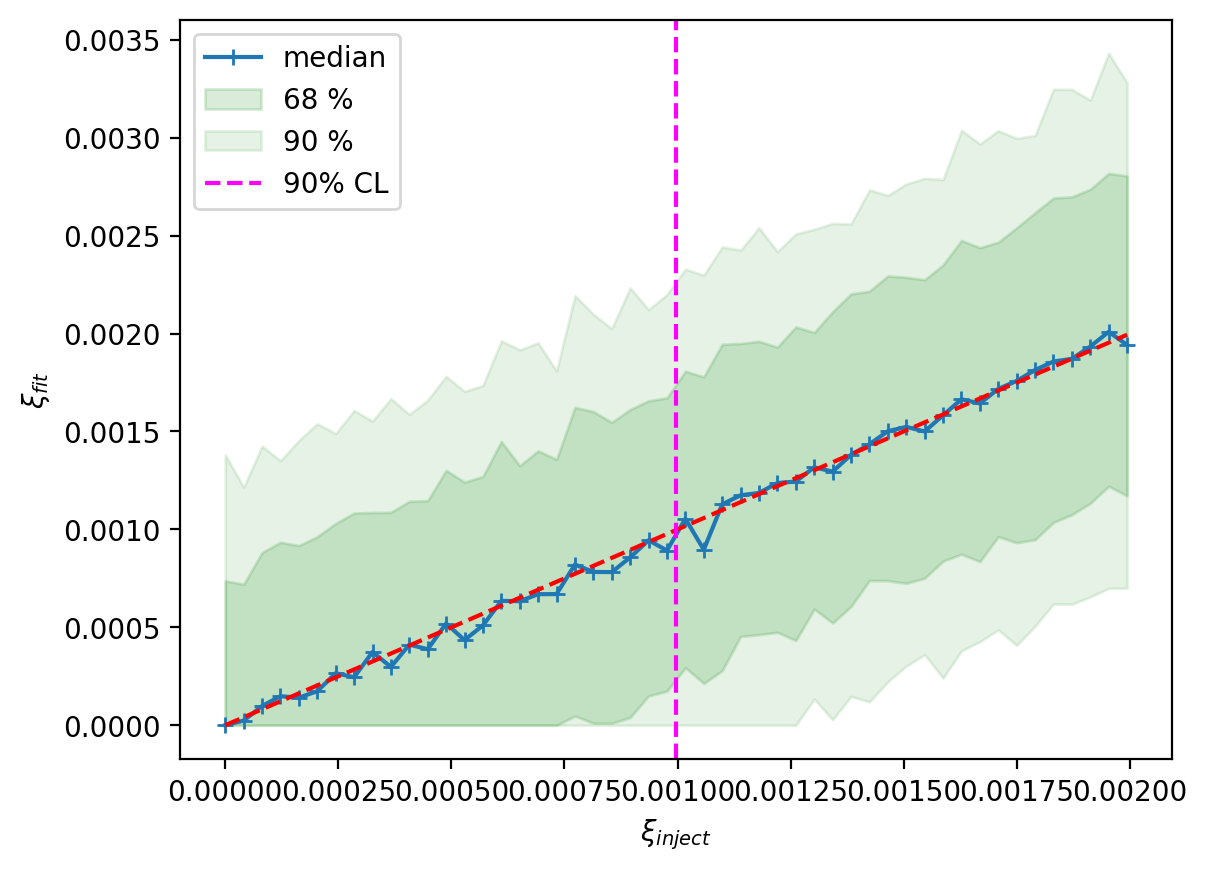

In [24]:
file = f'/data/user/tchau/DarkMatter_OscNext/Sensitivity/SignalRecovery/ann_numunumu_NFW_100.0GeV_MCfit1122_MCinj1122_llhSignalSub_gcinjNone_gcmodelNone_fixgpTrue.pkl'



output = pkl.load(open(file, 'rb'))


f_inj = output['f_inj']

plt.plot(f_inj, output['mean'], marker="+", label='median')

plt.fill_between(f_inj, output['32'], output['68'], alpha=.15, color='green', label='68 %')
plt.fill_between(f_inj, output['10'], output['90'], alpha=.1, color='green', label='90 %')

# plt.title(r"NFW - $W^{+} W^{-}$" + " - 100 GeV\n" + f"inj with {labels[mcinj]}")
# plt.title(r"Decay, Burkert,  $W^{+} W^{-}$,M = 180 GeV")
# plt.title(r"Decay, Burkert,  $b\bar{b}$, M = 600 GeV")
# plt.title(r"Decay, Burkert, $\nu_\mu \bar{\nu}_\mu$, M = 100 GeV")



plt.plot(f_inj, f_inj, color='red', ls='--')
plt.axvline(x=output['xi_CL'], color='magenta', ls='--', label='90% CL')

plt.xlabel(r"$\xi_{inject}$")
plt.ylabel(r"$\xi_{fit}$")
plt.legend(loc=2)


# TS distribution

Checking validity of llh interval method

In [41]:
Tbkg = np.array([])
for i in range(0,10):
    f = pkl.load(open("/data/user/tchau/DarkMatter_OscNext/Sensitivity/TSdist/TSdist_WW_100.0_MC1122_SignalSubtractionTrue_BkgTrial1/{}.pkl".format(i), "rb"))

    Tbkg = np.append(Tbkg, f)

T90 = np.array([])
for i in range(0,10):
    f = pkl.load(open("/data/user/tchau/DarkMatter_OscNext/Sensitivity/TSdist/TSdist_WW_100.0_MC1122_SignalSubtractionTrue_BkgTrial0/{}.pkl".format(i), "rb"))
    T90 = np.append(T90, f)   

Text(0.5, 0, '$\\lambda$')

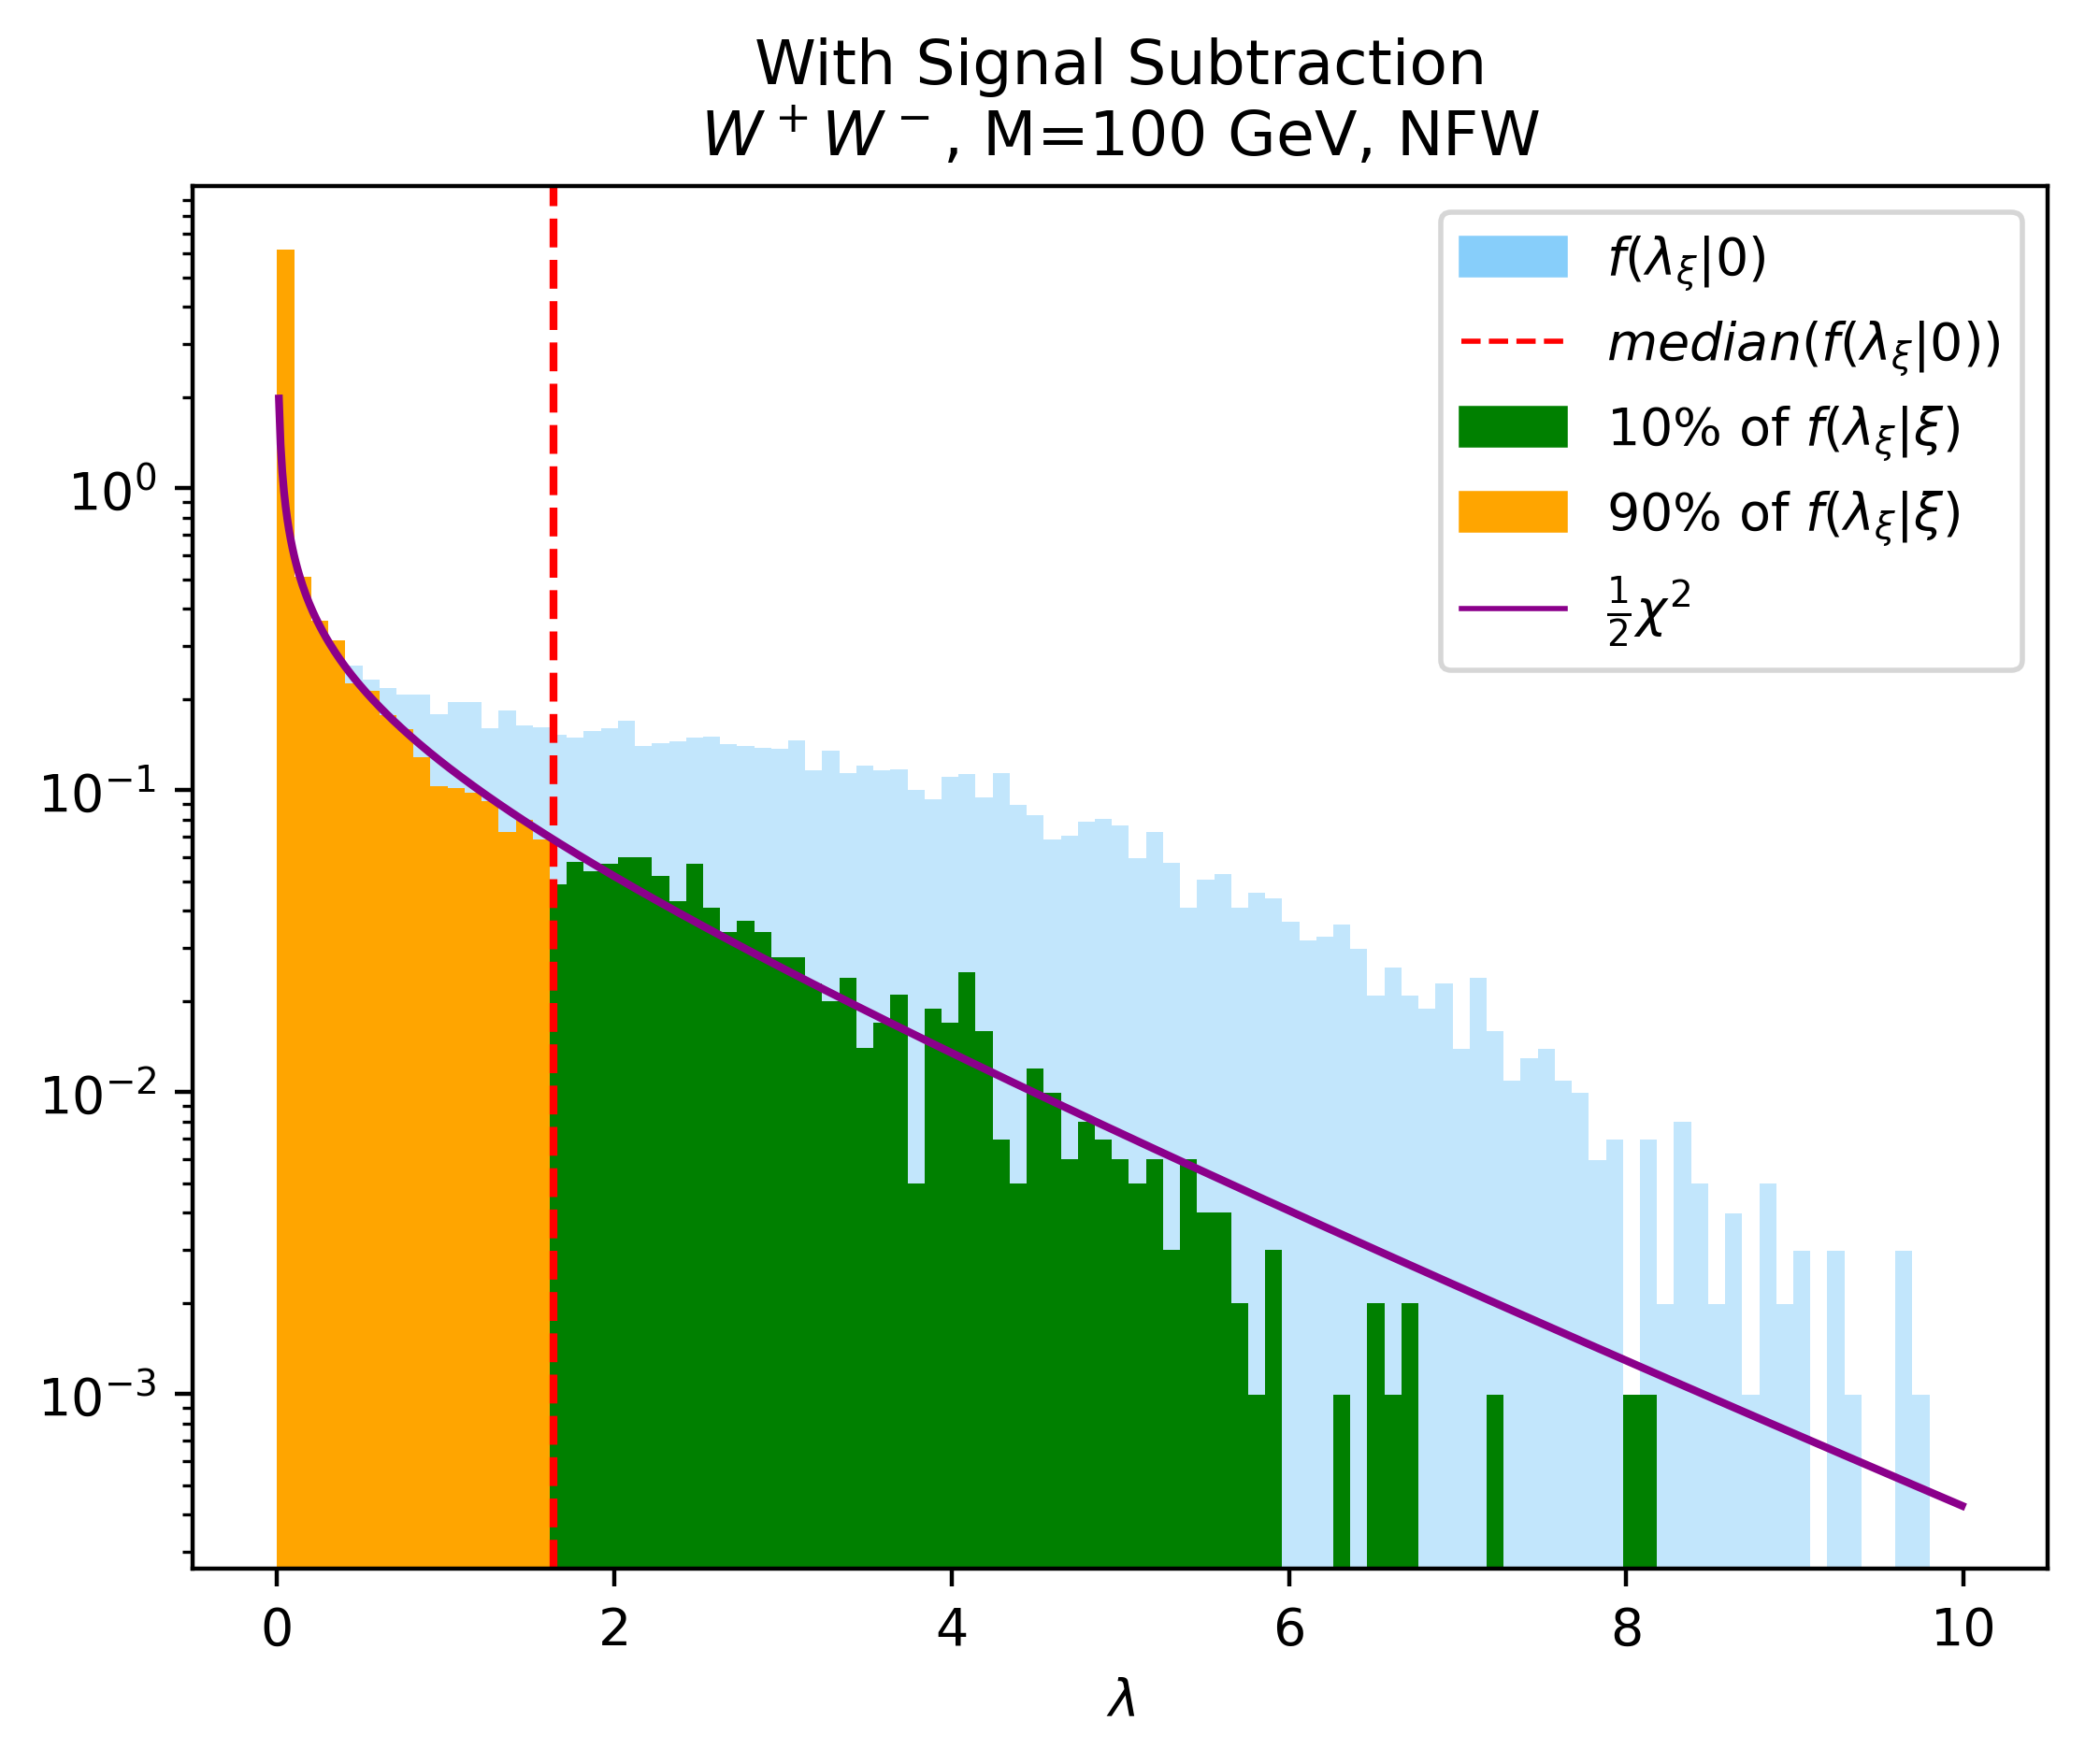

In [42]:
plt.rcParams['figure.dpi']= 400
bin = np.linspace(0, 10, 100)
plt.hist(Tbkg, bin, density=True, alpha=0.5, label=r"$f(\lambda_0|0)$", color='lightskyblue')
plt.axvline(x=1.64, color='r', linestyle='--', label=r"$median(f(\lambda_0|0))$")


x = np.arange(0, 10, 0.01)
plt.plot(x, 1/2*chi2.pdf(x, df=1), label=r"$1/2 \chi^2$", color='darkmagenta')
plt.semilogy()
plt.title("With Signal Subtraction\n"+r"$W^+W^-$, M=100 GeV, NFW")

# 90 % quantile
x90 = np.quantile(T90, 0.9)
N, bins, patches = plt.hist(T90, bin, density=True)

for i in range(bin.size-1):
    if bin[i] > x90:
        patches[i].set_facecolor('green')
    else:    
        patches[i].set_facecolor('orange')
np.median(Tbkg)
plt.legend()

from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle

legend_elements = [Rectangle((0,0),0,0,color='lightskyblue', label=r"$f(\lambda_\xi|0)$"),
                Line2D([0], [0], color='r', ls='--', lw=1, label=r"$median(f(\lambda_\xi|0))$"),
                Rectangle((0,0),0,0,color='green', label='10% of '+r'$f(\lambda_{\xi}|\xi)$'),
                Rectangle((0,0),0,0,color='orange', label='90% of '+r'$f(\lambda_{\xi}|\xi)$'),
                Line2D([0], [0], color='darkmagenta', ls='-', lw=1, label=r"$\frac{1}{2} \chi^2$")]
                   
plt.legend(handles=legend_elements, loc='upper right')
plt.xlabel(r"$\lambda$")

Checking effect of Galactic Plane

In [44]:
Tbkg = np.array([])
for i in range(0,5):
    f = pkl.load(open("/data/user/tchau/DarkMatter_OscNext/Sensitivity/TSdist/TSdist_numunumu_200.0_decay_MCfit1122_Mcinj1122_SignalSubtractionTrue_BkgTrial0/{}.pkl".format(i), "rb"))
    Tbkg = np.append(Tbkg, f)
x0 = np.quantile(Tbkg, 0.9)


Tbkg1 = np.array([])
for i in range(0,5):
    f = pkl.load(open("/data/user/tchau/DarkMatter_OscNext/Sensitivity/TSdist/TSdist_numunumu_200.0_decay_MCfit1122_Mcinj1122_SignalSubtractionTrue_BkgTrial0_GPinjectKRA50_IC_GPmodelNone/{}.pkl".format(i), "rb"))
    Tbkg1 = np.append(Tbkg1, f)
x1 = np.quantile(Tbkg1, 0.9)

Tbkg2 = np.array([])
for i in range(0,5):
    f = pkl.load(open("/data/user/tchau/DarkMatter_OscNext/Sensitivity/TSdist/TSdist_numunumu_200.0_decay_MCfit1122_Mcinj1122_SignalSubtractionTrue_BkgTrial0_GPinjectpi0_IC_GPmodelNone/{}.pkl".format(i), "rb"))
    Tbkg2 = np.append(Tbkg2, f)
x2 = np.quantile(Tbkg2, 0.9)


Tbkg3 = np.array([])
for i in range(0,5):
    f = pkl.load(open("/data/user/tchau/DarkMatter_OscNext/Sensitivity/TSdist/TSdist_numunumu_200.0_decay_MCfit1122_Mcinj1122_SignalSubtractionTrue_BkgTrial0_GPinjectKRA50_IC_GPmodelpi0_IC/{}.pkl".format(i), "rb"))
    Tbkg3 = np.append(Tbkg3, f) 
x3 = np.quantile(Tbkg3, 0.9)

Tbkg4 = np.array([])
for i in range(0,5):
    f = pkl.load(open("/data/user/tchau/DarkMatter_OscNext/Sensitivity/TSdist/TSdist_numunumu_200.0_decay_MCfit1122_Mcinj1122_SignalSubtractionTrue_BkgTrial0_GPinjectpi0_IC_GPmodelKRA50_IC/{}.pkl".format(i), "rb"))
    Tbkg4 = np.append(Tbkg4, f) 
x4 = np.quantile(Tbkg4, 0.9)


Text(0.5, 0, 'TS')

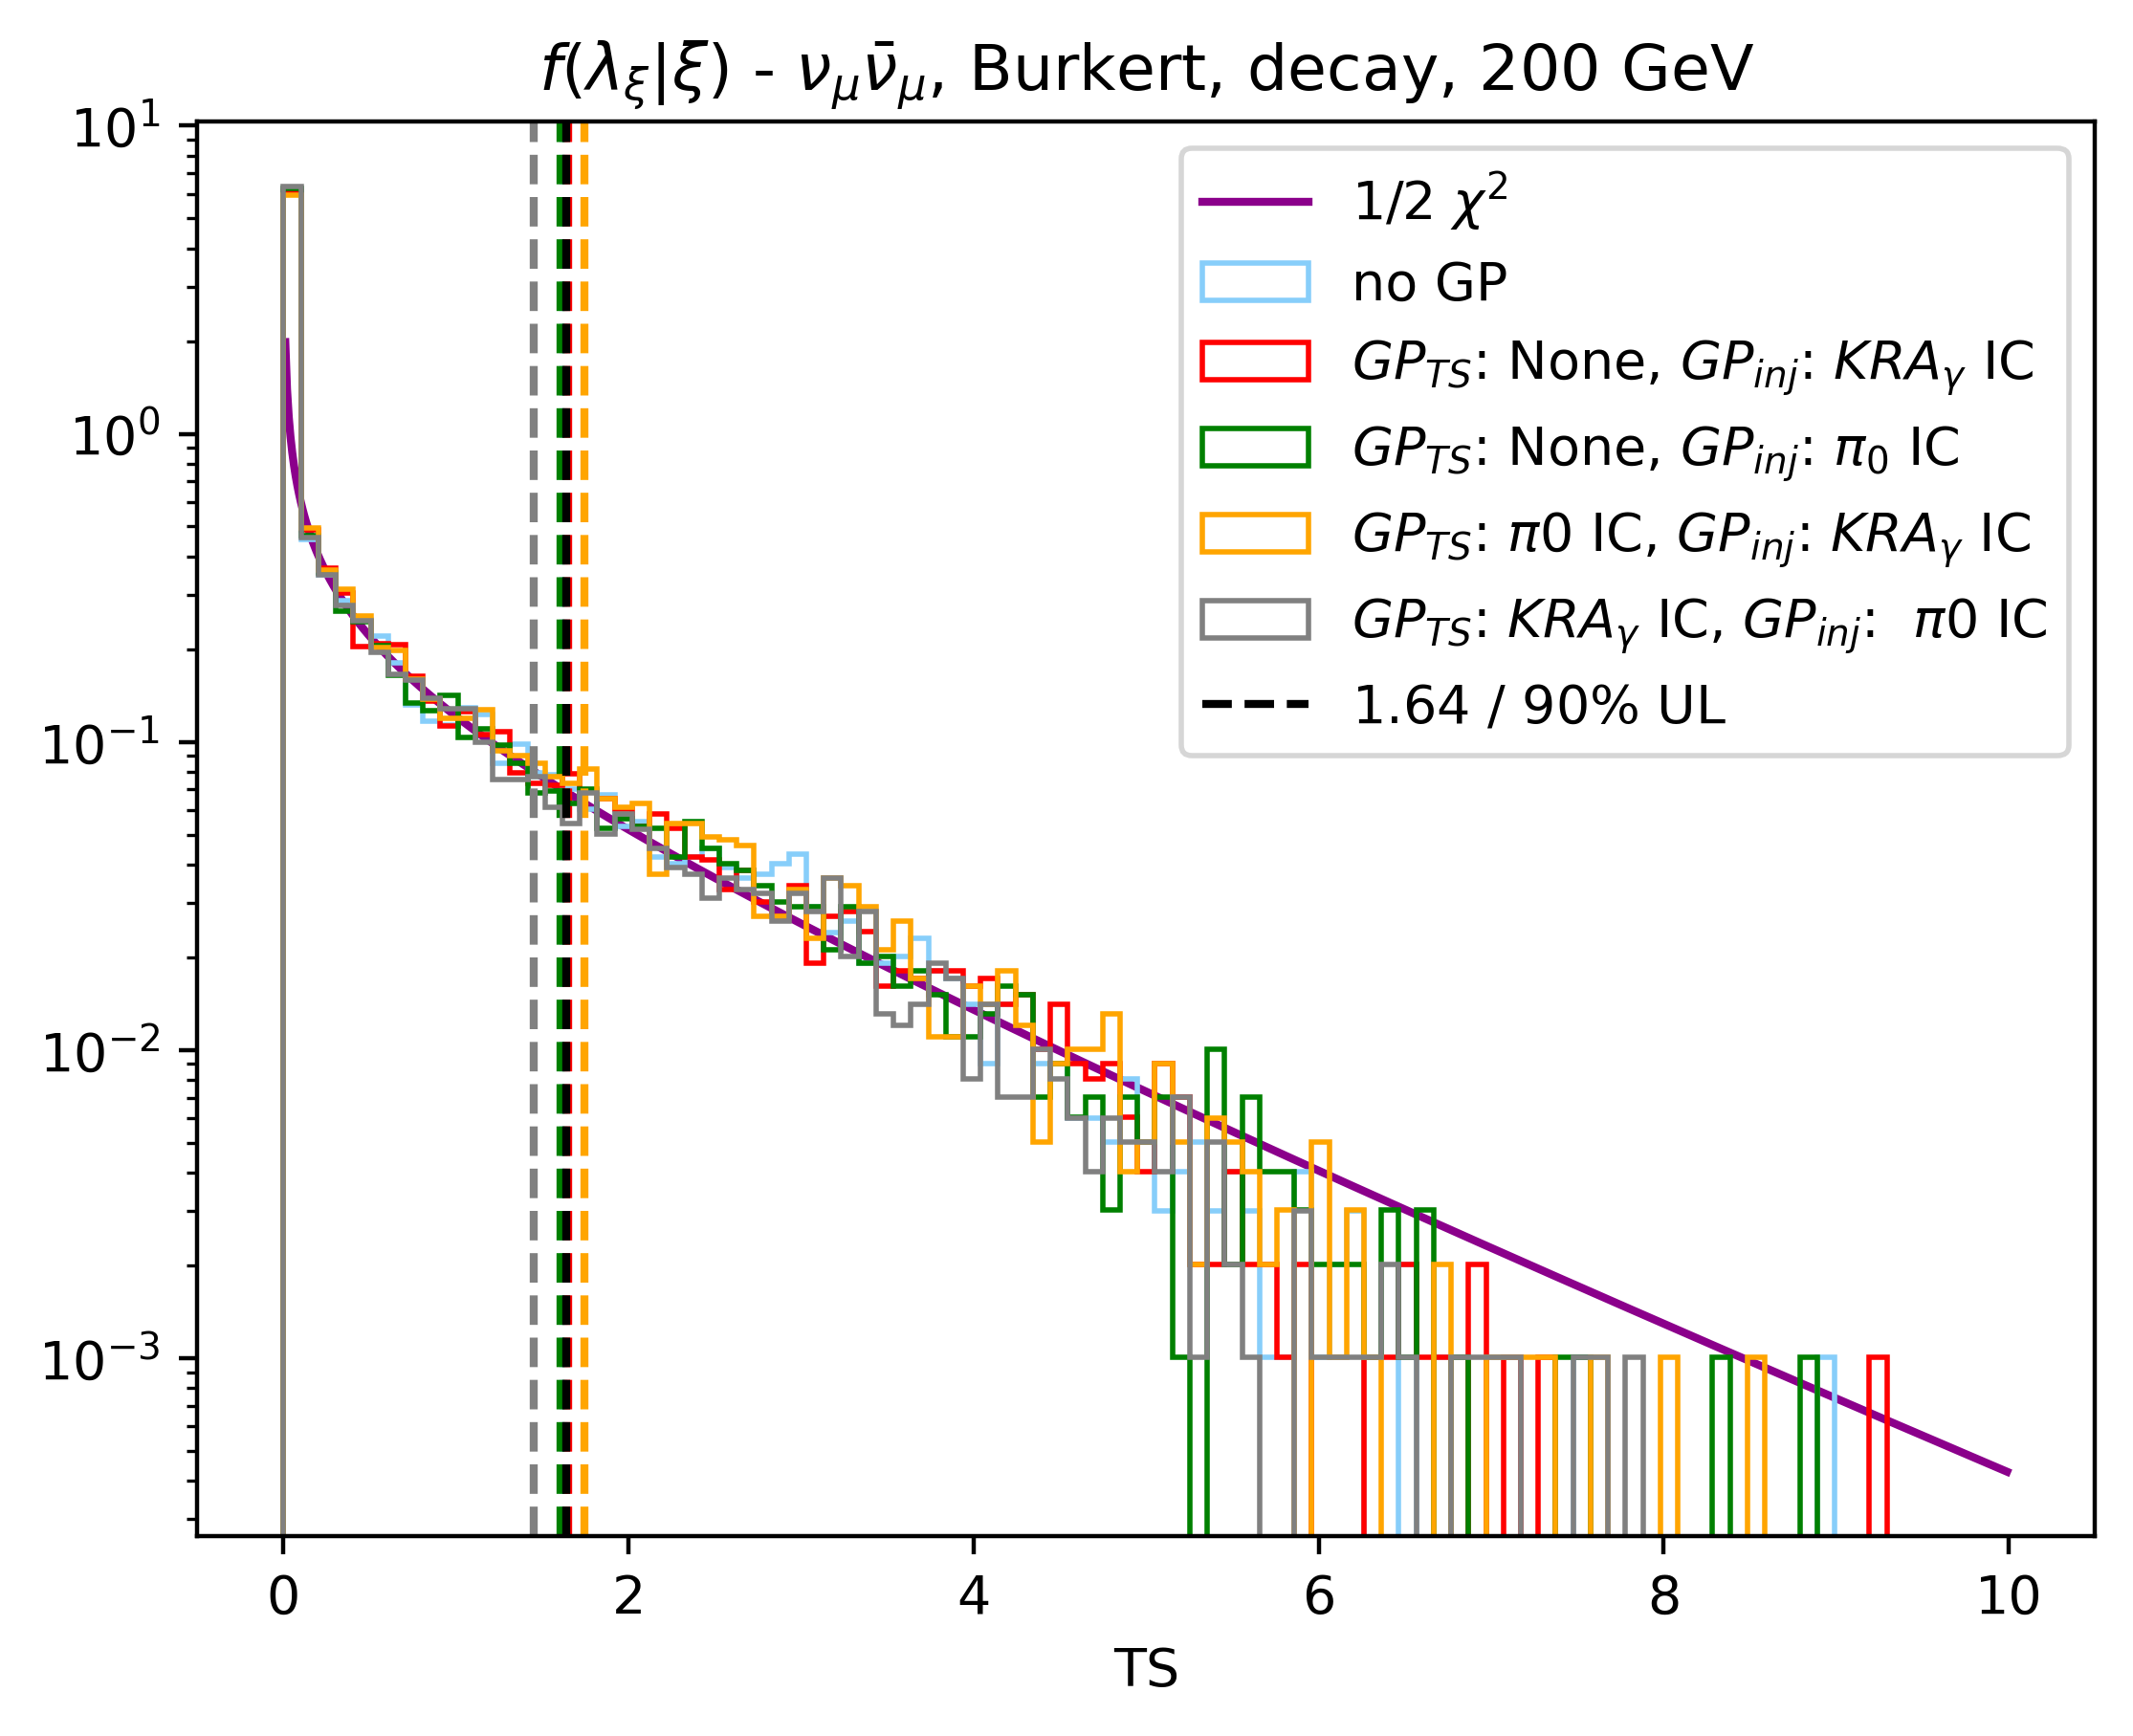

In [45]:
bin = np.linspace(0, 10, 100)
x = np.arange(0, 10, 0.01)
plt.plot(x, 1/2*chi2.pdf(x, df=1), label=r"1/2 $\chi^2$", color='darkmagenta')

plt.hist(Tbkg, bin, density=True, histtype='step', label=r"no GP", color='lightskyblue')
plt.axvline(x=x0,  color='lightskyblue', ls='--')

plt.hist(Tbkg1, bin, density=True, histtype='step', label=r"$GP_{TS}$: None, $GP_{inj}$: $KRA_{\gamma}$ IC", color='red')
plt.axvline(x=x1,  color='red', ls='--')

plt.hist(Tbkg2, bin, density=True, histtype='step', label=r"$GP_{TS}$: None, $GP_{inj}$: $\pi_0$ IC", color='green')
plt.axvline(x=x2,  color='green', ls='--')

plt.hist(Tbkg3, bin, density=True, histtype='step', label=r"$GP_{TS}$: $\pi0$ IC, $GP_{inj}$: $KRA_{\gamma}$ IC", color='orange')
plt.axvline(x=x3,  color='orange', ls='--')

plt.hist(Tbkg4, bin, density=True, histtype='step', label=r"$GP_{TS}$: $KRA_{\gamma}$ IC, $GP_{inj}$:  $\pi0$ IC", color='grey')
plt.axvline(x=x4,  color='grey', ls='--')

plt.axvline(x=1.64,  color='black', ls='--', label=r'1.64 / $90 \%$ UL')


plt.title(r'$f(\lambda_\xi| \xi)$ - $\nu_\mu \bar{\nu}_\mu$, Burkert, decay, 200 GeV')
plt.legend()
plt.semilogy()
plt.xlabel('TS')